In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
from matplotlib.colors import rgb2hex
import mapclassify
import adjustText as aT


# incorporamos geopandas! geografía + pandas :)
import geopandas as gpd
from sklearn.preprocessing import normalize

%matplotlib inline
sns.set(context='notebook', font='Fira Sans', style='white', palette='plasma')

In [2]:
codigoRegion=5

In [3]:
dataPobreza = pd.read_excel('data/Indice_Pobreza_Porcentaje_Casem2018.xlsx')
dataPobreza.head()

,CODIGO,MUNICIPIO,Indice_Pobreza_Porcentaje_Casem2018
0,1101,IQUIQUE,5.33
1,1107,ALTO HOSPICIO,8.51
2,1401,POZO ALMONTE,10.33
3,1402,CAMIÑA,34.87
4,1403,COLCHANE,23.96


In [5]:
zonas_eod = gpd.read_file('data/Comunas', encoding="utf-8",converters={'cod_comuna':str})
zonas_eod = zonas_eod[zonas_eod.cod_comuna != 5104]
zonas_eod = zonas_eod[zonas_eod.cod_comuna != 5201]
zonas_eod.head(3)

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."


In [6]:
dataset = pd.merge(zonas_eod, dataPobreza, left_on='cod_comuna',right_on='CODIGO',how='inner') 
dataset.head(3)

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,CODIGO,MUNICIPIO,Indice_Pobreza_Porcentaje_Casem2018
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731....",6204,MARCHIHUE,12.52
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596....",6102,CODEGUA,14.15
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621....",6103,COINCO,15.59


In [7]:
dataset[['Indice_Pobreza_Porcentaje_Casem2018']].describe()

,Indice_Pobreza_Porcentaje_Casem2018
count,343.000000
mean,17.260466
std,9.467027
min,0.030000
25%,10.155000
50%,15.840000
75%,22.760000
max,50.240000


findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.


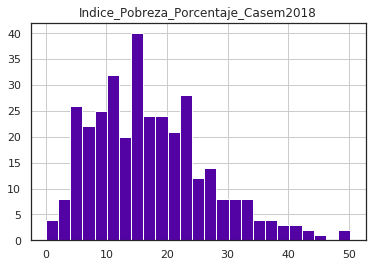

In [8]:
hist = dataset[['Indice_Pobreza_Porcentaje_Casem2018']].hist(bins=25)

In [9]:
dataset[dataset['Comuna']=='Puente Alto'].head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,CODIGO,MUNICIPIO,Indice_Pobreza_Porcentaje_Casem2018
118,292,48961.65484,12,7,13201,13,1.269446e+08,58874.136921,Región Metropolitana de Santiago,Puente Alto,Cordillera,"POLYGON ((-7848546.332 -3968052.875, -7848478....",13201,PUENTE ALTO,8.02


In [10]:
codigoRegion=13
nombreProvincia='Santiago'
datasetRegion=dataset[dataset['codregion']==codigoRegion]
datasetRegion=dataset[dataset['Provincia']==nombreProvincia]
datasetRegion=[datasetRegion,dataset[dataset['Comuna']=='Puente Alto']]
datasetRegion=pd.concat(datasetRegion)
datasetRegion.head(200)


,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,CODIGO,MUNICIPIO,Indice_Pobreza_Porcentaje_Casem2018
26,330,13987.326781,10,7,13129,13,1.424341e+07,16812.167615,Región Metropolitana de Santiago,San Joaquín,Santiago,"POLYGON ((-7861762.687 -3958307.095, -7861708....",13129,SAN JOAQUÍN,6.60
36,331,13311.641304,13,7,13130,13,1.389538e+07,15988.816037,Región Metropolitana de Santiago,San Miguel,Santiago,"POLYGON ((-7863229.775 -3964360.652, -7863319....",13130,SAN MIGUEL,3.46
47,332,11733.486710,13,7,13131,13,9.056280e+06,14061.528858,Región Metropolitana de Santiago,San Ramón,Santiago,"POLYGON ((-7863398.118 -3964354.273, -7863319....",13131,SAN RAMÓN,9.41
56,309,11488.695747,9,7,13108,13,1.068637e+07,14088.417488,Región Metropolitana de Santiago,Independencia,Santiago,"POLYGON ((-7865631.125 -3948404.075, -7865643....",13108,INDEPENDENCIA,9.85
60,310,12797.595762,13,7,13109,13,1.454185e+07,15442.412755,Región Metropolitana de Santiago,La Cisterna,Santiago,"POLYGON ((-7865040.615 -3968217.521, -7865077....",13109,LA CISTERNA,3.63
67,323,36618.971695,11,7,13122,13,7.709271e+07,43954.336968,Región Metropolitana de Santiago,Peñalolén,Santiago,"POLYGON ((-7852667.025 -3963533.211, -7852700....",13122,PEÑALOLÉN,4.75
81,324,16072.408276,10,7,13123,13,2.073083e+07,19223.740933,Región Metropolitana de Santiago,Providencia,Santiago,"POLYGON ((-7857468.292 -3952687.257, -7857424....",13123,PROVIDENCIA,0.74
85,314,23724.899355,11,7,13113,13,3.361510e+07,28343.661508,Región Metropolitana de Santiago,La Reina,Santiago,"POLYGON ((-7852374.608 -3952376.018, -7852375....",13113,LA REINA,2.34
109,333,24644.018619,10,7,13101,13,3.337678e+07,29171.609500,Región Metropolitana de Santiago,Santiago,Santiago,"POLYGON ((-7864917.074 -3952801.626, -7864220....",13101,SANTIAGO,5.93
119,308,32111.265818,9,7,13107,13,6.431963e+07,38432.099760,Región Metropolitana de Santiago,Huechuraba,Santiago,"POLYGON ((-7869094.986 -3944017.368, -7869086....",13107,HUECHURABA,6.11


In [11]:
datasetRegion[datasetRegion['Comuna']=='Puente Alto'].head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,CODIGO,MUNICIPIO,Indice_Pobreza_Porcentaje_Casem2018
118,292,48961.65484,12,7,13201,13,1.269446e+08,58874.136921,Región Metropolitana de Santiago,Puente Alto,Cordillera,"POLYGON ((-7848546.332 -3968052.875, -7848478....",13201,PUENTE ALTO,8.02


In [12]:
datasetRegion["center"] = datasetRegion["geometry"].centroid
datasetRegion_points = datasetRegion.copy()
datasetRegion_points.set_geometry("center", inplace = True)

In [9]:
ax = dataset.plot(figsize=(300, 300), column='Indice_Pobreza_Porcentaje_Casem2018', 
                        cmap='YlOrRd', legend=True, linewidth=0.5, 
                         edgecolor='#abacab', scheme='Fisher_Jenks', k=5)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))
ax.set_axis_off()

1

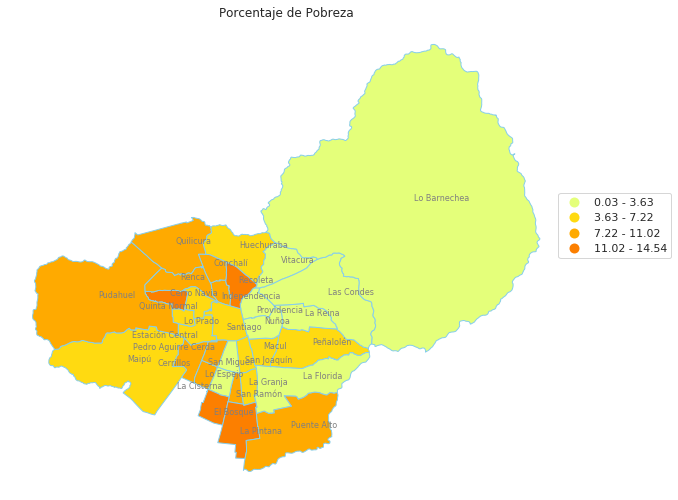

In [36]:
ax = datasetRegion.plot(figsize=(10, 10), column='Indice_Pobreza_Porcentaje_Casem2018', 
                         cmap='Wistia', legend=True, linewidth=1, 
                         edgecolor='#87CEEB', scheme='Fisher_Jenks', k=4)

plt.title('Porcentaje de Pobreza')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))
ax.set_axis_off()

texts = []
for x, y, label in zip(datasetRegion_points.geometry.x, datasetRegion_points.geometry.y, datasetRegion_points["Comuna"]):
    texts.append(plt.text(x, y, label, fontsize = 8,color='grey'))

#aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0), arrowprops=dict(arrowstyle="-", color='white', lw=0.5))
aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0))

In [10]:
zonas_eod.plot(figsize=(300, 300), color='#efefef', edgecolor='#abacab', linewidth=0.5)